<h2>Polynomial Regression (PR)<h2>

<h4>Model description</h4>
Polynomial regression is a type of regression analysis in which the relationship between the independent variable 𝑥 and the dependent variable 𝑦 is modeled as an 𝑛 th degree polynomial. <br>

Unlike simple linear regression, which models data with a straight line, polynomial regression can capture more complex relationships by using curves.

$$ Y = b_0 + b_1 X_1 ^1 +  b_2 X_1 ^2 + ... +  b_n X_1 ^n $$

- Y: dependent variable;
- $b_0$: y-intercept (constant);
- $b_i$: coefficient;
- $X_1$: independent variable;

<h4>Loading dataset</h4>

In [1]:
import pandas as pd

df_position_salaries = pd.read_csv("Position_Salaries.csv")

In [2]:
print(df_position_salaries.isnull().sum())

Position    0
Level       0
Salary      0
dtype: int64


In [3]:
X = df_position_salaries.iloc[:, 1].values.reshape(-1, 1)
y = df_position_salaries.iloc[:, -1].values

In [4]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [5]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


<h4>Creating the matrix of power features</h4>

In [6]:
from sklearn.preprocessing import PolynomialFeatures

polyFeatures = PolynomialFeatures(degree = 3)
X_poly = polyFeatures.fit_transform(X)

In [7]:
print(X_poly)

[[   1.    1.    1.    1.]
 [   1.    2.    4.    8.]
 [   1.    3.    9.   27.]
 [   1.    4.   16.   64.]
 [   1.    5.   25.  125.]
 [   1.    6.   36.  216.]
 [   1.    7.   49.  343.]
 [   1.    8.   64.  512.]
 [   1.    9.   81.  729.]
 [   1.   10.  100. 1000.]]


<h4>Training the Polynomial Regression</h4>

In [8]:
from sklearn.linear_model import LinearRegression

poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)

LinearRegression()

<h4>Training the Linear Regression</h4>

In [9]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

<h4>Visualising the regression results</h4>

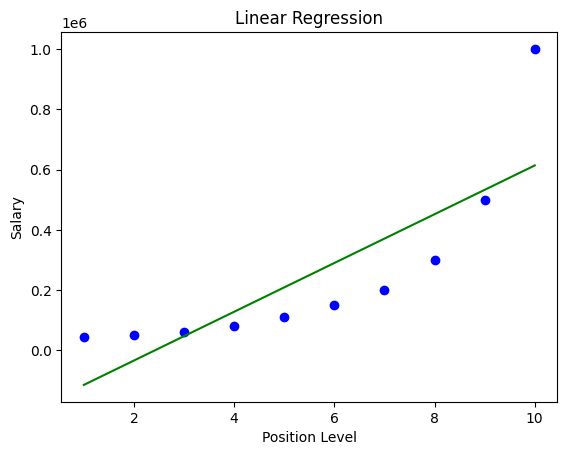

In [10]:
import matplotlib.pyplot as plt 

plt.scatter(X, y, c="blue")
plt.plot(X, lin_reg.predict(X), c="green")
plt.title("Linear Regression")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()


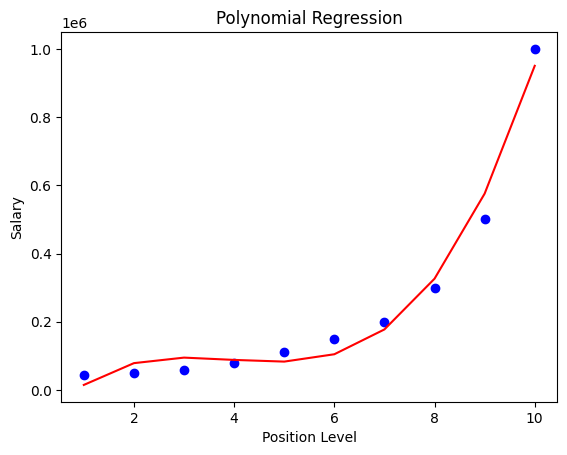

In [11]:
plt.scatter(X, y, c="blue")
plt.plot(X, poly_reg.predict(X_poly), c="red")
plt.title("Polynomial Regression")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

<h4>Getting the final polynomial regresssion equation with the values of the coefficients</h4>

In [12]:
print(poly_reg.coef_)
print(poly_reg.intercept_)

[     0.         180664.33566432 -48548.95104895   4120.04662005]
-121333.33333330275


$$ Salary = -121333.3 + 180664.3 PositionLevel + (-48548.9) PositionLevel ^2 + 4120 PositionLevel ^3$$